# Initialization

In [12]:
# General Definitions
from sage.symbolic.integration.integral import definite_integral
var('ec,a,L,T,b,c,h,x')
%display plain
# %display latex

# Elliptic Orbit

## Derivation of Spatial Averages

In [ ]:
# r: spatial average for elliptic orbits
assume(ec<1)
definite_integral(a*(1-ec^2)/(1+ec*cos(x)),x,0,2*pi)/(2*pi)

## Derivation of Temporal Averages

In [22]:
# r: temporal average for elliptic orbits
factor(definite_integral(a*(1-ec*cos(x))^2,x,0,2*pi)/(2*pi))

1/2*(ec^2 + 2)*a

# Hyperbolic Trayectory

## Derivation of Spatial Averages

In [ ]:
# r: spatial average for hyperbolic trayectory
assume(ec>1)
definite_integral(a*(1-ec^2)/(1+ec*cos(x)),x,0,2*pi)/(2*pi)

## Derivation of Temporal Averages

In [377]:
# r: temporal average for hyperbolic trayectory
m = 2*(ec*sinh(h)-h)
aa = definite_integral((1-ec*cosh(x))^2,x,-h,h)*(-a)*(1/m)
factor(aa.full_simplify())

-1/8*(4*ec^2*h*e^(2*h) + ec^2*e^(4*h) - 16*ec*e^(2*h)*sinh(h) - ec^2 + 8*h*e^(2*h))*a*e^(-2*h)/(ec*sinh(h) - h)

In [316]:
# F: temporal average for hyperbolic trayectory
assume(ec>1)
assume(h>0)
m = 2*(ec*sinh(h)-h);
aa = definite_integral(1/(1-ec*cosh(x)),x,-h,h)*(-L/a^2)*(1/m)
factor(aa.full_simplify())

L*(arctan(-(ec - e^h)*e^(-h)/sqrt(ec^2 - 1)) + arctan((ec*e^h - 1)/sqrt(ec^2 - 1)))/(sqrt(ec^2 - 1)*(ec*sinh(h) - h)*a^2)

In [21]:
# Teq: temporal average for hyperbolic trayectory
assume(ec>1)
assume(h>0)
m=2*(ec*sinh(h)-h);
factor(definite_integral(sqrt(1-ec*cosh(x)),x,-h,h)*(-T)*(L*(1-b)/a^2)^(1/4)*(1/m))

-1/2*T*(-L*(b - 1)/a^2)^(1/4)*integrate(sqrt(-ec*cosh(x) + 1), x, -h, h)/(ec*sinh(h) - h)

# Parabolic Trayectory

In [21]:
 def lprint(z):
        print z
        print
        print latex(z)
        print
        %display latex
        return show(z)

## Derivation of Temporal Averages

In [23]:
# r: temporal average for parabolic trayectory
var('D,rp,x')
assume(D>0)
m = 2*(D+D^3/3)
aa = rp*definite_integral((1+x^2)^2,x,-D,+D)/m
bb = factor(aa.full_simplify())
lprint(bb)

1/5*(3*D^4 + 10*D^2 + 15)*rp/(D^2 + 3)

\frac{{\left(3 \, D^{4} + 10 \, D^{2} + 15\right)} \mathit{rp}}{5 \, {\left(D^{2} + 3\right)}}



1/5*(3*D^4 + 10*D^2 + 15)*rp/(D^2 + 3)

In [25]:
# F: temporal average for parabolic trayectory
var('D,rp,L,x')
m = 2*(D+D^3/3)
aa = (L/rp^2)*definite_integral((1+x^2)^(-1),x,-D,+D)/m
bb = factor(aa.full_simplify())
lprint(bb)

3*L*arctan(D)/((D^2 + 3)*D*rp^2)

\frac{3 \, L \arctan\left(D\right)}{{\left(D^{2} + 3\right)} D \mathit{rp}^{2}}



3*L*arctan(D)/((D^2 + 3)*D*rp^2)

In [102]:
# Teq: temporal average for parabolic trayectory
var('D,rp,L,T,b,x')
m = 2*(D+D^3/3)
aa = T*(L*(1-b)/rp^2)^(1/4)*definite_integral((1+x^2)^(1/2),x,-D,+D)/m
bb = factor(aa.full_simplify())
lprint(bb)

3/2*(sqrt(D^2 + 1)*D + arcsinh(D))*T*(-L*(b - 1)/rp^2)^(1/4)/((D^2 + 3)*D)

\frac{3 \, {\left(\sqrt{D^{2} + 1} D + {\rm arcsinh}\left(D\right)\right)} T \left(-\frac{L {\left(b - 1\right)}}{\mathit{rp}^{2}}\right)^{\frac{1}{4}}}{2 \, {\left(D^{2} + 3\right)} D}



3/2*(sqrt(D^2 + 1)*D + arcsinh(D))*T*(-L*(b - 1)/rp^2)^(1/4)/((D^2 + 3)*D)

# Hyperbolic Calculations: (i.e. 'Oumuamua) 

In [68]:
ht = 3.71 # hyperbolic anomaly (5.08 for size of Solar System ~122 AU)
par = {h: ht, ec:1.2, a: -1.275, L: 1.0, T: 278.5, b: 0.1}

H     (hyperbolic anomaly ): 3.71000000000000
f     (true anomaly       ): 144.860029293312 degrees
M     (mean anomaly       ): 20.7875974022312
r     (position vector    ): 29.9968872984504 AU
t     (time from periapsis): 4.76584799265094 years
<r>   (average distance   ): 15.8128042787533 AU
<F>   (average flux       ): 0.112791125758701
<Teq> (average temp       ): 85.6542712205156 K


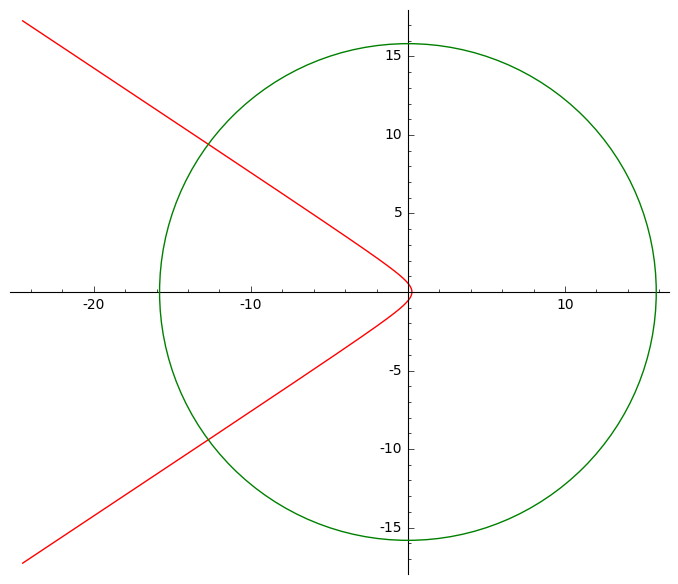

In [69]:
# constants
mu = 1.32712440018e20 # standard gravitational parameter
au = 149597870700 # astronomical unit
yr = 3.154e+7 # year

rt = a*(1-ec*cosh(ht)) # position
ft = (2*arctan(sqrt((ec+1)/(ec-1))*tanh(ht/2))) # true anomaly
mt = ec*sinh(ht)-ht # mean anomaly
tt = (mt/sqrt(-mu/(a*au)^3))/yr # time

# 'Oumuamua Average Distance (AU)
mm = 2*(ec*sinh(h)-h);
ru = definite_integral((1-ec*cosh(x))^2,x,-h,h)*(-a)*(1/mm)

# 'Oumuamua Average Flux (Solar Units)
assume(ec>1)
assume(h>0)
fu = definite_integral(1/(1-ec*cosh(x)),x,-h,h)*(-L/a^2)*(1/mm)

# 'Oumuamua Average Teq (K)
Tspace = 0 # K (minimum temperature)
ss = T*(L*(1-b)/a^2)^(1/4)*(1/mm)
Te = numerical_integral(ss.subs(par)*((1-ec.subs(par)*cosh(x))^2)^(1/4),-h.subs(par), h.subs(par)) 
Tu = Te[0] + Tspace

print 'H     (hyperbolic anomaly ):', numerical_approx(ht.subs(par))
print 'f     (true anomaly       ):', numerical_approx(ft.subs(par)*180/pi), 'degrees'
print 'M     (mean anomaly       ):', numerical_approx(mt.subs(par))
print 'r     (position vector    ):', numerical_approx(rt.subs(par)), 'AU'
print 't     (time from periapsis):', numerical_approx(tt.subs(par)), 'years'
print '<r>   (average distance   ):', numerical_approx(ru.subs(par)), 'AU'
print '<F>   (average flux       ):', numerical_approx(fu.subs(par))
print '<Teq> (average temp       ):', numerical_approx(Tu), 'K'

cc = circle((0,0), ru.subs(par), color = 'green')
pp = polar_plot(a.subs(par)*(1-(ec.subs(par))^2)/(1+ec.subs(par)*cos(x)), (x,-ft.subs(par),+ft.subs(par)), color='red')

show(pp + cc)

In [4]:
# <r> verification

y = -(1/2)*((ec^2+2)*h+ec*sinh(h)*(ec*cosh(h) - 4))*a/(ec*sinh(h)-h) # Maxima & Mathematica

print latex(y)
print
print y
print
print numerical_approx(y.subs(par))

-\frac{{\left({\left(\mathit{ec} \cosh\left(h\right) - 4\right)} \mathit{ec} \sinh\left(h\right) + {\left(\mathit{ec}^{2} + 2\right)} h\right)} a}{2 \, {\left(\mathit{ec} \sinh\left(h\right) - h\right)}}

-1/2*((ec*cosh(h) - 4)*ec*sinh(h) + (ec^2 + 2)*h)*a/(ec*sinh(h) - h)

15.8128042787533


# Verification

In [5]:
# <F> verification

y1 = L*(arctan(-(ec - e^h)*e^(-h)/sqrt(ec^2 - 1)) + arctan((ec*e^h - 1)/sqrt(ec^2 - 1)))/(sqrt(ec^2 - 1)*(ec*sinh(h) - h)*a^2) # Maxima
y2 = L*(arctan(sqrt(ec^2 - 1)/(ec*csch(h)-1))+pi)/(sqrt(ec^2 - 1)*(ec*sinh(h) - h)*a^2) # Maxima simplification
y3 = 2*L*(arctan((1+ec)*tanh(h/2)/sqrt(ec^2 - 1)))/(sqrt(ec^2 - 1)*(ec*sinh(h) - h)*a^2) # Mathematica

print latex(y3)
print
print y3
print
print numerical_approx(y3.subs(par))

\frac{2 \, L \arctan\left(\frac{{\left(\mathit{ec} + 1\right)} \tanh\left(\frac{1}{2} \, h\right)}{\sqrt{\mathit{ec}^{2} - 1}}\right)}{\sqrt{\mathit{ec}^{2} - 1} {\left(\mathit{ec} \sinh\left(h\right) - h\right)} a^{2}}

2*L*arctan((ec + 1)*tanh(1/2*h)/sqrt(ec^2 - 1))/(sqrt(ec^2 - 1)*(ec*sinh(h) - h)*a^2)

0.112791125758702


In [64]:
# <Teq> verification

# y = -2*I*(ec-1)*((1-b)*L/a^2)^(1/4)*T*sqrt((ec*cosh(h)-1)/(ec-1))*elliptic_e(I*h/2,2*ec/(ec-1))/(sqrt(ec*cosh(h)-1)*(ec*sinh(h)-h)) # Mathematica 
# y = -2*I*(ec-1)*((1-b)*L/a^2)^(1/4)*T*sqrt(1/(ec-1))*elliptic_e(I*h/2,2*ec/(ec-1))/(ec*sinh(h)-h) # Mathematica simplification
y = -2*I*(ec-1)*((1-b)*L/a^2)^(1/4)*T*sqrt(1/(ec-1))*elliptic_e(I*h/2,2*ec/(ec-1))/(ec*sinh(h)-h) # Mathematica simplification

print latex(y)
print
print y
print
print numerical_approx(y.subs(par))

\frac{T {\left(-2 i \, \mathit{ec} + 2 i\right)} \left(-\frac{L {\left(b - 1\right)}}{a^{2}}\right)^{\frac{1}{4}} E(\frac{1}{2} i \, h\,|\,\frac{2 \, \mathit{ec}}{\mathit{ec} - 1})}{{\left(\mathit{ec} \sinh\left(h\right) - h\right)} \sqrt{\mathit{ec} - 1}}

T*(-2*I*ec + 2*I)*(-L*(b - 1)/a^2)^(1/4)*elliptic_e(1/2*I*h, 2*ec/(ec - 1))/((ec*sinh(h) - h)*sqrt(ec - 1))

85.6542712209461


# Elliptic Calculations: (e.g. Halley Comet)

In [18]:
par1 = {ec: 0.96714291, a: 17.834145, L: 1.0, T: 278.5, b: 0.04} # 1P/Halley
par2 = {ec: 0.84832024, a: 2.2151323, L: 1.0, T: 278.5, b: 0.046} # 2P/Encke
par3 = {ec: 0.64058232, a: 3.4647374, L: 1.0, T: 278.5, b: 0.06} # 67P/Churyumov–Gerasimenko
par4 = {ec: 0.8440912, a: 487.7651, L: 1.0, T: 278.5, b: 0.046} # 90377 Sedna
par5 = {ec: 0.8268093, a: 1.0779459, L: 1.0, T: 278.5, b: 0.046} # 1566 Icarus
par6 = {ec: 0.20374511, a: 1.126391, L: 1.0, T: 278.5, b: 0.046} # 101955 Bennu

pare = par6

In [19]:
# temporal averages

Tspace = 0.0 # K
rr = a*(1+ec^2/2)
ff = L/(a^2*sqrt(1-ec^2))
tt = T*((1-b)*L/a^2)^(1/4)*2*sqrt(1+ec)/pi*elliptic_ec(2*ec/(1+ec)) + Tspace # elliptic_ec implementation equal to Mathematica

rp = a*(1-ec)
ra = a*(1+ec)

tmin = T*((1-b)*L/ra^2)^(1/4) + Tspace
tmax = T*((1-b)*L/rp^2)^(1/4) + Tspace

print '<r>   (average distance   ):', numerical_approx(rr.subs(pare)), 'AU'
print '<F>   (average flux       ):', numerical_approx(ff.subs(pare))
print '<Teq> (average temp       ):', numerical_approx(tt.subs(pare)), 'K'
print 'Tmin  (minimum temp       ):', numerical_approx(tmin.subs(pare)),'K @', numerical_approx(ra.subs(pare)),'AU'
print 'Tmax  (maximum temp       ):', numerical_approx(tmax.subs(pare)),'K @', numerical_approx(rp.subs(pare)),'AU'

<r>   (average distance   ): 1.14977041093459 AU
<F>   (average flux       ): 0.805060154586956
<Teq> (average temp       ): 258.659401427687 K
Tmin  (minimum temp       ): 236.374399946391 K @ 1.35588765819801 AU
Tmax  (maximum temp       ): 290.630809183749 K @ 0.896894341801990 AU


# Appendix

## Average Distance

### Hyperbolic

Original equation from simplification:
\begin{align}
\langle r \rangle = -\frac{{\left({\left(\mathit{e} \cosh\left(H\right) - 4\right)} \mathit{e} \sinh\left(H\right) + {\left(\mathit{e}^{2} + 2\right)} H\right)} a}{2 \, {\left(\mathit{e} \sinh\left(H\right) - H\right)}}
\end{align}

Fixed version for paper:
\begin{align}
\langle r \rangle = -a \left[\frac{e \left(e \cosh{H_o} - 4\right) \sinh{H_o} + \left(e^{2} + 2\right) H_o}{2\left(e \sinh{H_o} - H_o\right)}\right]
\end{align}

\begin{align}
\langle r \rangle = r_p \left[\frac{e \left(e \cosh{H_o} - 4\right) \sinh{H_o} + \left(e^{2} + 2\right) H_o}{2\left(e \sinh{H_o} - H_o\right) \left( e-1 \right) } \right]
\end{align}

### Parabolic

Original equation from simplification:
\begin{align}
\langle r \rangle = \frac{{\left(3 \, D^{4} + 10 \, D^{2} + 15\right)} \mathit{r_p}}{5 \, {\left(D^{2} + 3\right)}}
\end{align}

Fixed version for paper:
\begin{align}
\langle r \rangle = r_p \left[ \frac{3 {D_o}^{4} + 10 {D_o}^{2} + 15}{5 \left({D_o}^{2} + 3\right)} \right]
\end{align}

### Linear

Original equation from simplification:
\begin{align}
\langle r \rangle = r_p \left[\frac{\cosh\left(H\right) \sinh\left(H\right) + H}{2 \, \sinh\left(H\right)} \right]
\end{align}

Fixed version for paper:
\begin{align}
\langle r \rangle = r_p \left[\frac{\sinh 2H_o  + 2H_o}{4 \sinh H_o } \right]
\end{align}

## Average Flux

### Hyperbolic

Original equation from simplification:
\begin{align}
\langle F \rangle = \frac{2 \, L \arctan\left(\frac{{\left(\mathit{e} + 1\right)} \tanh\left(\frac{1}{2} \,H\right)}{\sqrt{\mathit{e}^{2} - 1}}\right)}{\sqrt{\mathit{e}^{2} - 1} {\left(\mathit{e} \sinh\left(H\right) - H\right)} a^{2}}
\end{align}

Fixed version for paper:
\begin{align}
\langle F \rangle = \frac{L}{a^2\sqrt{e^2 - 1}} \left[ \frac{2}{e \sinh{H_o} - H_o}\tan^{-1}\left({\frac{\left(e + 1\right) \tanh{\frac{1}{2}H_o}}{\sqrt{e^2 - 1}}}\right) \right]
\end{align}

\begin{align}
\langle F \rangle = \frac{L}{r_p^2\sqrt{e^2 - 1}} \left[ \frac{2 \left( e - 1 \right)^2}{e \sinh{H_o} - H_o}\tan^{-1}\left({\frac{\left(e + 1\right) \tanh{\frac{1}{2}H_o}}{\sqrt{e^2 - 1}}}\right) \right]
\end{align}

\begin{align}
\langle F \rangle = \frac{L}{r_p^2} \left[ \frac{2 \left( e - 1 \right)^2} {\left(e \sinh{H_o} - H_o\right)\sqrt{e^2 - 1}  }\tan^{-1}\left({\frac{\left(e + 1\right) \tanh{\frac{1}{2}H_o}}{\sqrt{e^2 - 1}}}\right) \right]
\end{align}


### Parabolic

Original equation from simplification:
\begin{align}
\langle F \rangle = \frac{3 \, L \arctan\left(D\right)}{{\left(D^{2} + 3\right)} D \mathit{r_p}^{2}}
\end{align}

Fixed version for paper:
\begin{align}
\langle F \rangle = \frac{L}{r_p^2} \left[ \frac{3 \tan^{-1} D_o}{{\left({D_o}^2 + 3\right)} D_o} \right]
\end{align}

### Linear

Original equation from simplification:
\begin{align}
\langle F \rangle = \frac{L}{r_p^2} \frac{2 \, \arctan\left(\tanh\left(\frac{1}{2} \, H\right)\right)}{\sinh\left(H\right)}
\end{align}

Fixed version for paper:
\begin{align}
\langle F \rangle = \frac{L}{r_p^2} \left[ \frac{2 \tan^{-1} \left( \tanh \frac{1}{2} H_o \right)}{\sinh H_o } \right]
\end{align}

## Average Temperature


### Hyperbolic

Original equation from simplification:
\begin{align}
\langle T_{eq} \rangle = \frac{T {\left(-2 i \, \mathit{e} + 2 i\right)} \left(-\frac{L {\left(A - 1\right)}}{a^{2}}\right)^{\frac{1}{4}} E(\frac{1}{2} i \, H\,|\,\frac{2 \, \mathit{e}}{\mathit{e} - 1})}{{\left(\mathit{e} \sinh\left(H\right) - H\right)} \sqrt{\mathit{e} - 1}}
\end{align}

Fixed version for paper:
\begin{align}
\langle T_{eq} \rangle = T_o \left[\frac{L {\left(1 - A\right)}}{\beta \epsilon a^{2}}\right]^{\frac{1}{4}} \left[ \frac{-2 i \sqrt{e-1}}{e \sinh{H_o} - H_o} \, {\rm \mathbf{E}}\left(\tfrac{1}{2}iH_o \, \big| \, \frac{2e}{e - 1}\right) \right]
\end{align}

\begin{align}
\langle T_{eq} \rangle = T_o \left[\frac{L {\left(1 - A\right)}}{\beta \epsilon r_p^{2}}\right]^{\frac{1}{4}} \left[ \frac{-2 i \left(e-1\right)}{e \sinh{H_o} - H_o} \, {\rm \mathbf{E}}\left(\tfrac{1}{2}iH_o \, \big| \, \frac{2e}{e - 1}\right) \right]
\end{align}

### Parabolic

Original equation from simplification:
\begin{align}
\langle T_{eq} \rangle = \frac{3 \, {\left(\sqrt{D^{2} + 1} D + {\rm arcsinh}\left(D\right)\right)} T_o \left(-\frac{L {\left(A - 1\right)}}{\beta \epsilon r_p^{2}}\right)^{\frac{1}{4}}}{2 \, {\left(D^{2} + 3\right)} D}
\end{align}

Fixed version for paper:
\begin{align}
\langle T_{eq} \rangle = T_o \left[\frac{L {\left(1 - A\right)}}{\beta \epsilon r_p^{2}}\right]^{\frac{1}{4}} \left[ \frac{3 {\left(D_o\sqrt{{D_o}^{2} + 1} + \sinh^{-1} D_o \right)}}{2 \, {\left({D_o}^{2} + 3\right)} D_o} \right]
\end{align}

### Linear

Original equation from simplification:
\begin{align}
\langle T_{eq} \rangle = T_o \left[\frac{L {\left(1 - A\right)}}{\beta \epsilon r_p^{2}}\right]^{\frac{1}{4}} \left[ -\frac{2 i \, E(\frac{1}{2} i \, H\,|\,2)}{\sinh\left(H\right)} \right]
\end{align}

Fixed version for paper:
\begin{align}
\langle T_{eq} \rangle = T_o \left[\frac{L {\left(1 - A\right)}}{\beta \epsilon r_p^{2}}\right]^{\frac{1}{4}} \left[ \frac{-2 i}{\sinh H_o } {\rm \mathbf{E}} \left(\tfrac{1}{2}iH_o\, \big| \,2 \right) \right]
\end{align}

# Elliptic Orbit Ratios (constant semi-major axis)

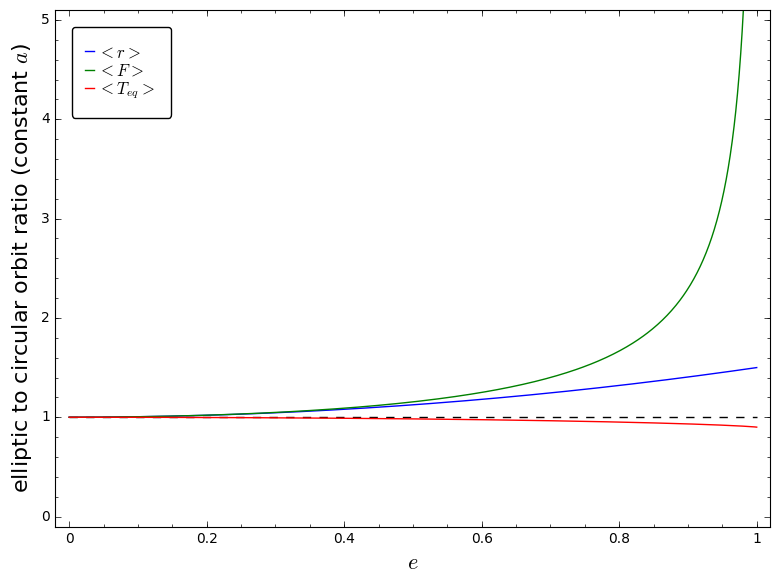

In [115]:
var('ec')

# equations

rfactor = (1+ec^2/2)
ffactor = 1/sqrt(1-ec^2)
tfactor = (2*sqrt(1+ec)/pi)*elliptic_ec(2*ec/(1+ec))

# create plot

p0 = line([(0,1), (1,1)], color = 'black', linestyle = '--')
p1 = plot(rfactor, (ec,0,1), color = 'blue', legend_label = '$<r>$')
p2 = plot(ffactor, (ec,0,1), color = 'green', legend_label = '$<F>$')
p3 = plot(tfactor, (ec,0,1), color = 'red', legend_label = '$<T_{eq}>$')
p = p0 + p1 + p2 + p3
p.set_axes_range(0, 1, 0, 5)
p.set_legend_options(fancybox=True, shadow=False, loc='upper left', borderaxespad=True, borderpad=1.0)
p.axes_labels(['$e$','elliptic to circular orbit ratio (constant $a$)'])
p.axes(False)

# show and save plot

p.show(frame=True)
p.save('ratio_elliptic_a.pdf', frame=True)

# Elliptic Orbit Ratios (constant periastron)

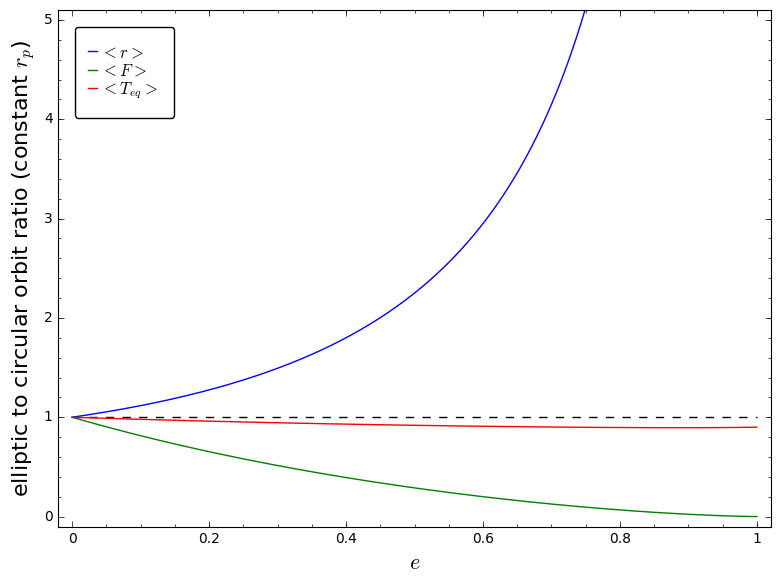

In [116]:
var('ec')

# equations

rfactor = (1+ec^2/2)*(1-ec)^(-1)
ffactor = 1/sqrt(1-ec^2)*(1-ec)^2
tfactor = (2*sqrt(1+ec)/pi)*elliptic_ec(2*ec/(1+ec))**(1-ec)^(1/2)

# create plot

p0 = line([(0,1), (1,1)], color = 'black', linestyle = '--')
p1 = plot(rfactor, (ec,0,1), color = 'blue', legend_label = '$<r>$')
p2 = plot(ffactor, (ec,0,1), color = 'green', legend_label = '$<F>$')
p3 = plot(tfactor, (ec,0,1), color = 'red', legend_label = '$<T_{eq}>$')
p = p0 + p1 + p2 + p3
p.set_axes_range(0, 1, 0, 5)
p.set_legend_options(fancybox=True, shadow=False, loc='upper left', borderaxespad=True, borderpad=1.0)
p.axes_labels(['$e$','elliptic to circular orbit ratio (constant $r_p$)'])
p.axes(False)

# show and save plot

p.show(frame=True)
p.save('ratio_elliptic_rp.pdf', frame=True)

# Hyperbolic Orbit Ratios (constant periastron)

In [100]:
# Normalization Factors (e = infinity)
print 'r:'
aa = limit((1/2)*((ec*cosh(h) - 4)*ec*sinh(h) + (ec^2 + 2)*h)/((ec*sinh(h) - h)*(ec-1)), ec=infinity)
lprint(aa)
print
print 'F:'
lprint(limit(2*(ec-1)^2*(arctan((1+ec)*tanh(h/2)/sqrt(ec^2 - 1)))/((ec*sinh(h) - h)*sqrt(ec^2-1)), ec=infinity))
print
print 'Teq:'
lprint(limit(-2*i*(ec-1)*elliptic_e(I*h/2,2)/(ec*sinh(h)-h), ec=infinity))

r:
1/2*(cosh(h)*sinh(h) + h)/sinh(h)

\frac{\cosh\left(h\right) \sinh\left(h\right) + h}{2 \, \sinh\left(h\right)}



1/2*(cosh(h)*sinh(h) + h)/sinh(h)


F:
2*arctan(tanh(1/2*h))/sinh(h)

\frac{2 \, \arctan\left(\tanh\left(\frac{1}{2} \, h\right)\right)}{\sinh\left(h\right)}



2*arctan(tanh(1/2*h))/sinh(h)


Teq:
-2*I*elliptic_e(1/2*I*h, 2)/sinh(h)

-\frac{2 i \, E(\frac{1}{2} i \, h\,|\,2)}{\sinh\left(h\right)}



-2*I*elliptic_e(1/2*I*h, 2)/sinh(h)

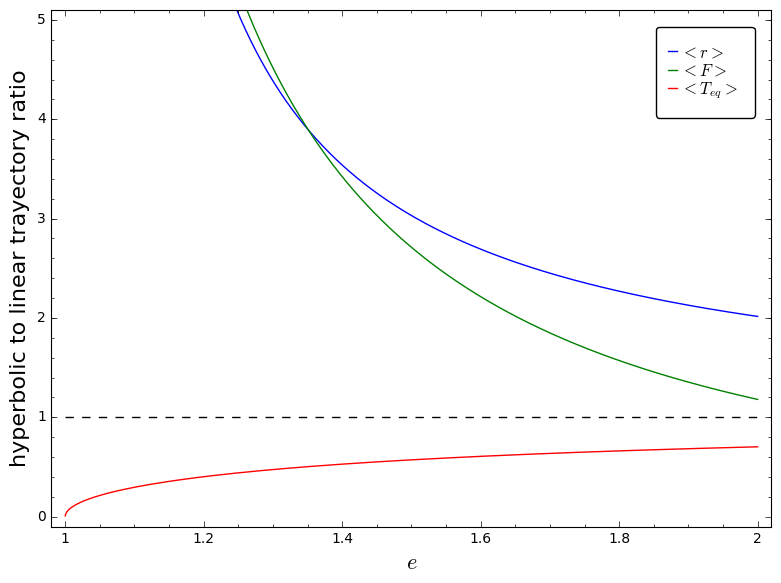

In [113]:
var('ec')

# equations

normal = 1/2*(cosh(h)*sinh(h) + h)/sinh(h)
rfactor = ((1/2)*((ec*cosh(h) - 4)*ec*sinh(h) + (ec^2 + 2)*h)/((ec*sinh(h) - h)*(ec-1))/normal).subs(h=5)

normal = 2*arctan(tanh(1/2*h))/sinh(h)
ffactor = (2*(1-e)^2*(arctan((1+ec)*tanh(h/2)/sqrt(ec^2 - 1)))/((ec*sinh(h) - h)*sqrt(ec^2-1))/normal).subs(h=5)

normal = -2*I*elliptic_e(1/2*I*h, 2)/sinh(h)
tfactor = (-2*I*(ec-1)*elliptic_e(I*h/2,2*ec/(ec-1))/(ec*sinh(h)-h)/normal).subs(h=5)

# create plot

p0 = line([(1,1), (2,1)], color = 'black', linestyle = '--')
p1 = plot(rfactor, (ec,1,2), color = 'blue', legend_label = '$<r>$')
p2 = plot(ffactor, (ec,1,2), color = 'green', legend_label = '$<F>$')
p3 = plot(tfactor, (ec,1,2), color = 'red', legend_label = '$<T_{eq}>$')
p = p0 + p1 + p2 + p3
p.set_axes_range(1, 2, 0, 5)
p.set_legend_options(fancybox=True, shadow=False, loc='upper right', borderaxespad=True, borderpad=1.0)
p.axes_labels(['$e$','hyperbolic to linear trayectory ratio'])
p.axes(False)

# show and save plot

p.show(frame=True)
p.save('ratio_hyperbolic.pdf', frame=True)

# Pruebas

In [18]:
eqr.subs(ec=2)

2*((cosh(4) - 2)*sinh(4) + 6)*a*(sinh(4) - 4)/(((cosh(4) - 4)*sinh(4) + 12)*(sinh(4) - 2))

In [58]:
N(cosh(100)), N(sinh(100))

(1.34405857090807e43, 1.34405857090807e43)

In [78]:
N(arctan(1000000000))

1.57079632579490

In [81]:
limit(arctan(x),x=infinity)

1/2*pi

In [82]:
limit(tanh(x),x=infinity)

1

In [85]:
limit(x/sinh(x),x=infinity)

0

In [87]:
N(0.5*2*cosh(10)-2)

11011.2329201033

In [93]:
arctan(Infinity)

1/2*pi

In [138]:
p = plot(tan, legend_label='tan')
p.set_legend_options()

{}

In [149]:
2 + \
3

5

In [66]:
show.options

AttributeError: 'function' object has no attribute 'options'

In [73]:
plot.help

AttributeError: 'function' object has no attribute 'help'

In [120]:
limit(elliptic_e(I*10.0/2,2*ec/(ec-1)),ec=1)

limit(elliptic_e(5.0*I, 2*ec/(ec - 1)), ec, 1)

In [11]:
real_part(N((-I*sqrt(ec-1)*elliptic_e(I*h/2,2*ec/(ec-1))/(ec*sinh(h)-h)* \
          (sinh(h)-h)/(2*sqrt(pi))).subs(h=5, ec=1.000001)))

NameError: name 'ec' is not defined

In [148]:
arctan(ec/2)

arctan(1/2*ec)

In [151]:
expand(cos(2*arctan(ec)))

cos(2*arctan(ec))

In [152]:
2+2

4

In [10]:
1+(tan(2/3*pi/2))^2

4

In [161]:
2/(1+cos(2/3*pi))

4

In [9]:
var('a,D')
a*factor(definite_integral((1+x^2)^2,x,-D,+D)/(2*(D+D^3/3)))

NameError: name 'definite_integral' is not defined

In [90]:
print limit((1/2)*((ec*cosh(h) - 4)*ec*sinh(h) + (ec^2 + 2)*h)/((ec*sinh(h) - h)*(ec-1)), ec=infinity)
print limit(2*(ec-1)^2*(arctan((1+ec)*tanh(h/2)/sqrt(ec^2 - 1)))/((ec*sinh(h) - h)*sqrt(ec^2-1)), ec=infinity)
print limit(-2*i*(ec-1)*elliptic_e(I*h/2,2)/(ec*sinh(h)-h), ec=infinity)

1/2*(cosh(h)*sinh(h) + h)/sinh(h)
2*arctan(tanh(1/2*h))/sinh(h)
-2*I*elliptic_e(1/2*I*h, 2)/sinh(h)


In [61]:
assume(sinh(h)-h>0)
print limit((ec^2 + 2)/(2*(sinh(h)-h)*(ec-1)), ec=1)
print limit(-2*i*(arctan((1+ec)*tanh(h/2)/sqrt(ec^2 - 1)))/((ec*sinh(h) - h)*(ec-1)), ec)

Infinity

In [71]:
%display plain

In [89]:
limit(2*ec/(ec - 1), ec=infinity)

2